# Import Libraries

In [14]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import *
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
%matplotlib inline

# Load Data

In [15]:
names=['id','id_str','screen_name','location','description','url','followers_count','friends_count','listedcount','created_at','favourites_count','verified','statuses_count','lang','status','default_profile','default_profile_image','has_extended_profile','name','bot']

df_bot=pd.read_csv('/Users/ap1992/Desktop/merge/bots_data.csv',header=None,delim_whitespace=False,names=names,na_values='?')
df_no_bots=pd.read_csv('/Users/ap1992/Desktop/merge/nonbots_data.csv',header=None,delim_whitespace=False,names=names,na_values='?')


# Merge and Clean Data

In [17]:
df = pd.merge(df_bot, df_no_bots, how = 'outer')

#deleting the unnecessary fields
del df['id']
del df ['id_str']
del df['screen_name']
del df['location']
del df['url']
del df['name']
del df['created_at']
del df['status']
del df['lang']

#Convert to Integer values
df['followers_count']=df['followers_count'].astype(int)
df['friends_count']=df['friends_count'].astype(int)
df['favourites_count'] = df['favourites_count'].astype(int)
df['statuses_count'] = df ['statuses_count'].astype(int)
df['verified']=df['verified'].astype(int)
df['default_profile']=df['default_profile'].astype(int)
df['listedcount']=df['listedcount'].astype(int)
df['default_profile_image'] = df['default_profile_image'].astype(int)
df['has_extended_profile'] = df.has_extended_profile.map( lambda x: 1 if x == 'True' else 0)
df['bot']=df['bot'].astype(int)

df.head(100)


,description,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot
0,A bot that tweets every line said by Fiddlefor...,1129,7,2,0,0,23557,0,0,0,1
1,NaN,0,22,0,0,0,1,1,1,0,1
2,NaN,3,0,3,0,0,1050,1,0,0,1
3,tasty recipes for robot // not for human // a ...,505,13,49,0,0,5109,0,0,0,1
4,bot by @dbaker_h,15,0,11,0,0,31365,1,0,0,1
5,SOCIAL ON GLOSSATORY: the branch of the consid...,16,1,4,0,0,1832,0,0,0,1
6,NaN,41,394,0,3,0,4,1,0,0,1
7,@Hedgehogize me or @Hedgehogize NAME to unlock...,549,370,12,12,0,4658,0,0,0,1
8,"I wasn't bor ysterday, was born tomorrow",0,60,0,0,0,10,1,0,0,1
9,Your diac No,0,43,4,48,0,86,1,0,0,1


# Split the samples into train/test

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(df.ix[:,0:11], df['bot'], test_size=0.2, random_state=0)

# Tokenizing with scikit-learn

In [8]:

#term frequency for training data
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train['description'].values.astype('U'))
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

#term frequency for test data
X_test_counts = count_vect.transform(X_test['description'].values.astype('U'))
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_test_counts)
X_test_tf = tf_transformer.transform(X_test_counts)


# Classifier Training

In [9]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tf, Y_train)

# Performance Evaluation

In [10]:
predicted = clf.predict(X_test_tf)
np.mean(predicted == Y_test)

0.73154362416107388

In [11]:
print("Accuracy Score:", (accuracy_score(Y_test,predicted )))
print("Precision Score: ", (precision_score(Y_test,predicted,average='micro' )))
print("Recall Score: ", (recall_score(Y_test,predicted,average='micro' )))
print("F1 Score: ", (f1_score(Y_test,predicted,average='micro' )))
print("AUC Score: ", (roc_auc_score(Y_test,predicted,average='micro' )))
print("Precision Score(weighted): ", (precision_score(Y_test,predicted,average='weighted' )))

('Accuracy Score:', 0.73154362416107388)
('Precision Score: ', 0.73154362416107388)
('Recall Score: ', 0.73154362416107388)
('F1 Score: ', 0.73154362416107388)
('AUC Score: ', 0.73252252252252248)
('Precision Score(weighted): ', 0.75414978261787191)


In [12]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predicted,pos_label=1)
metrics.auc(fpr, tpr)

0.73252252252252248

# Visualization 

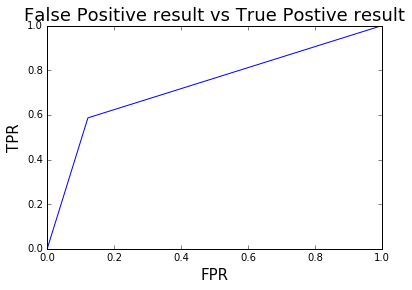

In [13]:
plt.title('False Positive result vs True Postive result', fontsize = 18)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)

plt.plot(fpr,tpr)